In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv("dataset/data.csv")
dataset.head()

,Country,ISO,Year,Annual CO2 emissions (per capita),Per-capita methane emissions in CO2 equivalents,Per-capita nitrous oxide emissions in CO2 equivalents,Population - Sex: all - Age: all - Variant: estimates,"GDP per capita, PPP (constant 2017 international $)",Temperature
0,Afghanistan,AFG,1995,0.086323,0.582011,0.160896,16418911.0,NaN,0.359
1,Afghanistan,AFG,1996,0.080092,0.616903,0.167429,17106600.0,NaN,-0.116
2,Afghanistan,AFG,1997,0.073313,0.639881,0.177091,17788818.0,NaN,0.471
3,Afghanistan,AFG,1998,0.069134,0.650288,0.184699,18493134.0,NaN,0.675
4,Afghanistan,AFG,1999,0.056671,0.672737,0.190177,19262854.0,NaN,1.198


In [4]:
rename_columns = ["Country", "ISO", "Year", "CO2_Emissions", "MH4_Emissions", "N2O_Emissions", "Population", "GDP", "Temperature"]

dataset.columns = rename_columns
dataset.head()

,Country,ISO,Year,CO2_Emissions,MH4_Emissions,N2O_Emissions,Population,GDP,Temperature
0,Afghanistan,AFG,1995,0.086323,0.582011,0.160896,16418911.0,NaN,0.359
1,Afghanistan,AFG,1996,0.080092,0.616903,0.167429,17106600.0,NaN,-0.116
2,Afghanistan,AFG,1997,0.073313,0.639881,0.177091,17788818.0,NaN,0.471
3,Afghanistan,AFG,1998,0.069134,0.650288,0.184699,18493134.0,NaN,0.675
4,Afghanistan,AFG,1999,0.056671,0.672737,0.190177,19262854.0,NaN,1.198


In [5]:
dataset.iloc[:, 3:].describe()

,CO2_Emissions,MH4_Emissions,N2O_Emissions,Population,GDP,Temperature
count,5312.000000,5312.000000,5312.000000,5.312000e+03,4650.000000,5058.000000
mean,4.692579,2.222406,0.500661,3.415018e+07,18101.596162,0.986457
std,6.257163,4.041717,0.578636,1.320267e+08,20216.036660,0.550519
min,0.015363,0.175880,0.006049,1.833000e+03,469.189514,-0.787000
25%,0.663863,0.765482,0.205163,1.340076e+06,3701.057434,0.618000
50%,2.502534,1.158411,0.323158,6.816810e+06,10724.138675,0.941500
75%,6.482120,1.932579,0.524307,2.235994e+07,25527.485838,1.313750
max,66.817245,58.034340,5.283387,1.425894e+09,161971.468800,3.691000


In [6]:
dataset['CO2_Emissions'].max()

66.817245

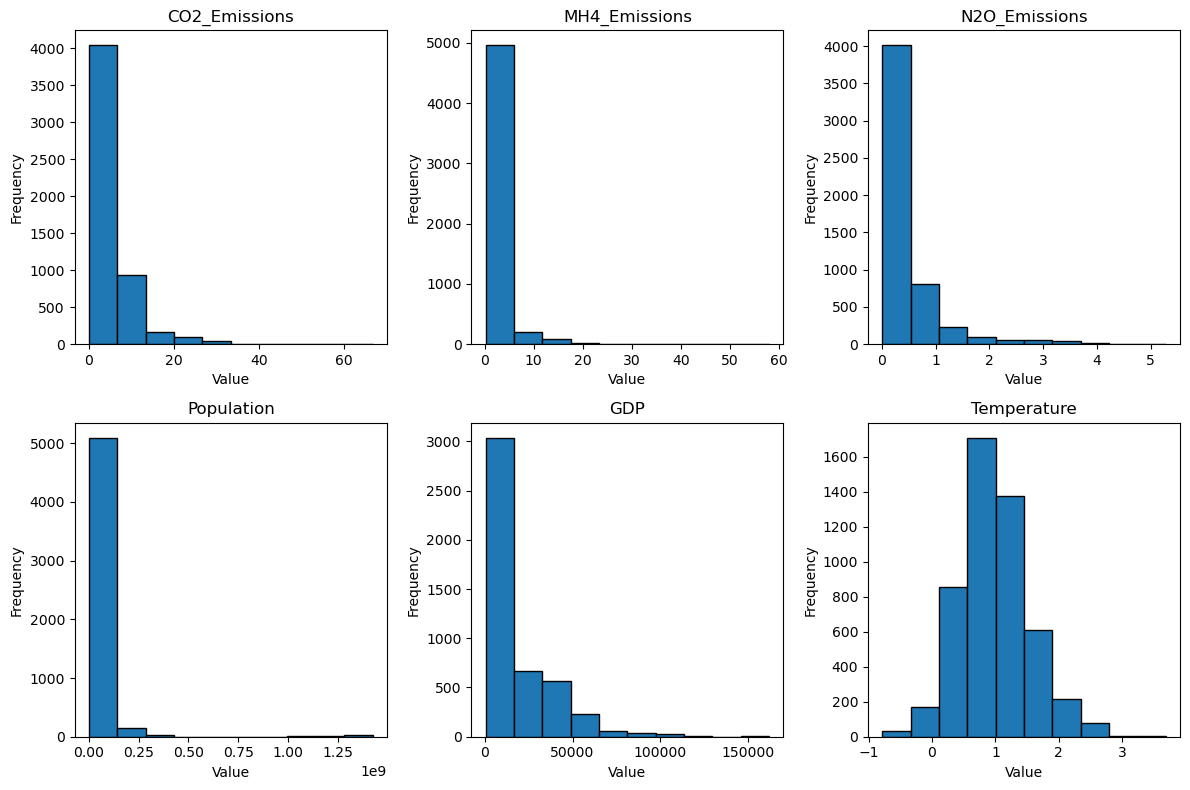

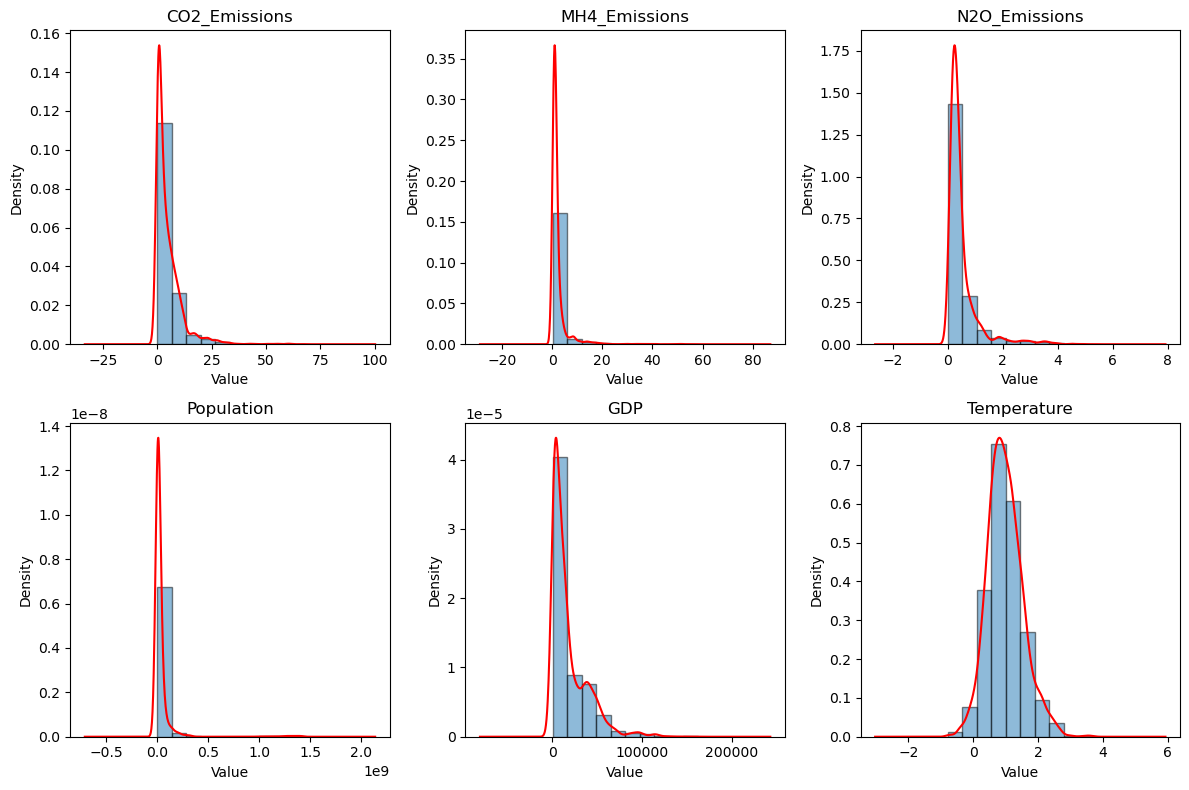

In [7]:

numerical_columns = rename_columns[3:]

# Plotting histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.hist(dataset[column], edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting density plots for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.hist(dataset[column], density=True, edgecolor='black', alpha=0.5)
    dataset[column].plot(kind='kde', color='red')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [8]:
year_temp = dataset.groupby("Year").agg(
    {
        'Temperature': 'mean'
    }
)

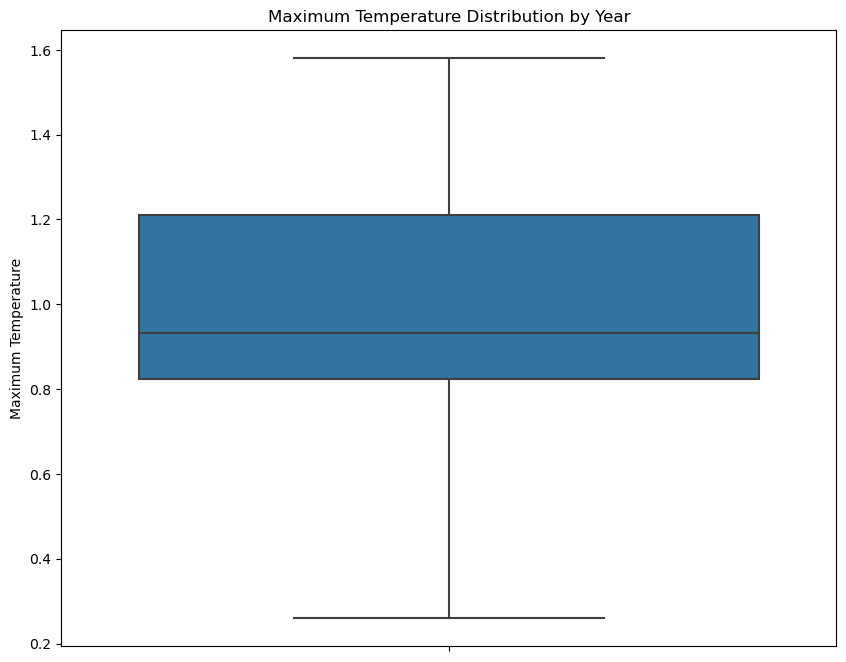

In [9]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(data=year_temp, y='Temperature')

# Set labels and title
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature Distribution by Year')

# Show the plot
plt.show()

In [10]:
# Group the data by year and calculate the total greenhouse gas emissions
dataset['Total Emissions'] = dataset['CO2_Emissions'] + dataset['MH4_Emissions'] + dataset['N2O_Emissions']
yearly_totals = dataset.groupby('Year')['Total Emissions'].sum()

# Create a new DataFrame for the stacked area plot
stacked_data = pd.DataFrame({
    'CO2 Emissions': dataset.groupby('Year')['CO2_Emissions'].sum(),
    'Methane Emissions': dataset.groupby('Year')['MH4_Emissions'].sum(),
    'Nitrous Oxide Emissions': dataset.groupby('Year')['N2O_Emissions'].sum(),
    'Total Greenhouse Gas Emissions': yearly_totals
})

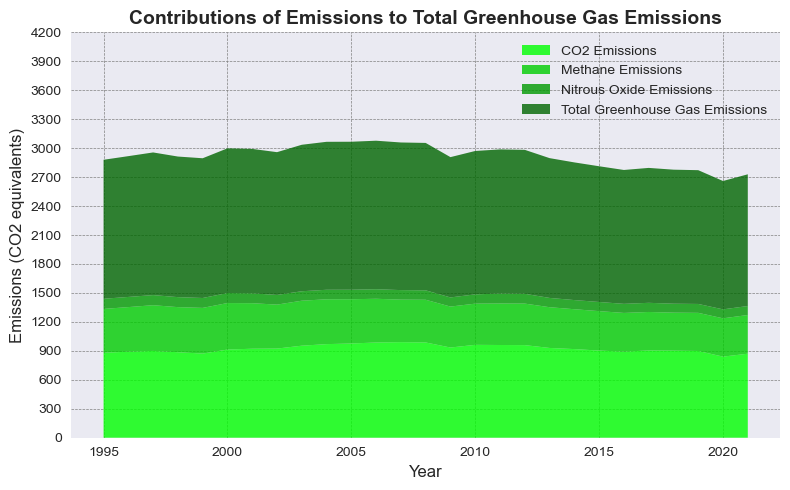

In [11]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 5))

ax.stackplot(
    stacked_data.index,
    stacked_data['CO2 Emissions'],
    stacked_data['Methane Emissions'],
    stacked_data['Nitrous Oxide Emissions'],
    stacked_data['Total Greenhouse Gas Emissions'],
    labels=['CO2 Emissions', 'Methane Emissions', 'Nitrous Oxide Emissions', 'Total Greenhouse Gas Emissions'],
    colors=['#00ff00', '#00cc00', '#009900', '#006600'],  # Different shades of green
    alpha=0.8
)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Emissions (CO2 equivalents)', fontsize=12)
ax.set_title('Contributions of Emissions to Total Greenhouse Gas Emissions', fontsize=14, fontweight='bold')

ax.tick_params(axis='both', which='both', labelsize=10, length=0)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

ax.grid(color='gray', linestyle='--', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

yticks = np.arange(0, 4500, 300)
ax.set_yticks(yticks)

ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


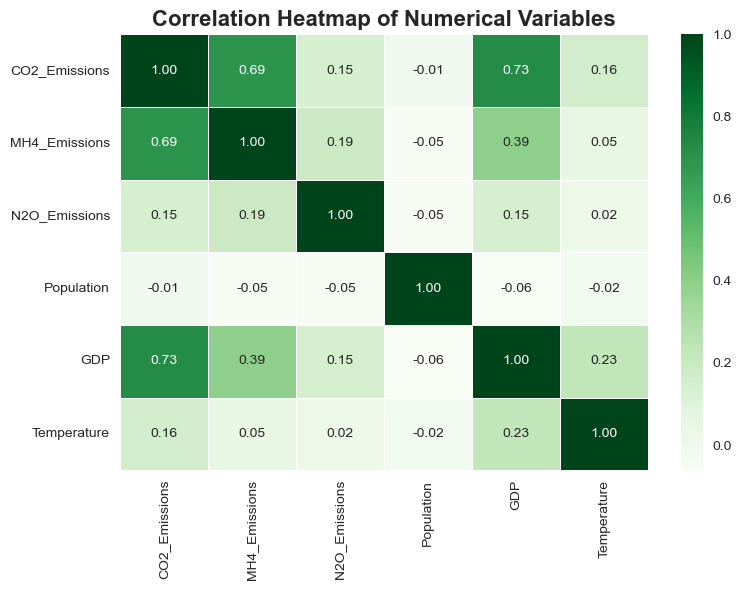

In [12]:

# Select the numerical columns for the heatmap
numerical_cols = rename_columns[3:]

plt.style.use('seaborn')

correlation_matrix = dataset[numerical_cols].corr()

cmap = sns.color_palette("Greens", as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(data=correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, ax=ax)

ax.set_title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')

ax.tick_params(axis='both', which='both', labelsize=10, length=0)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

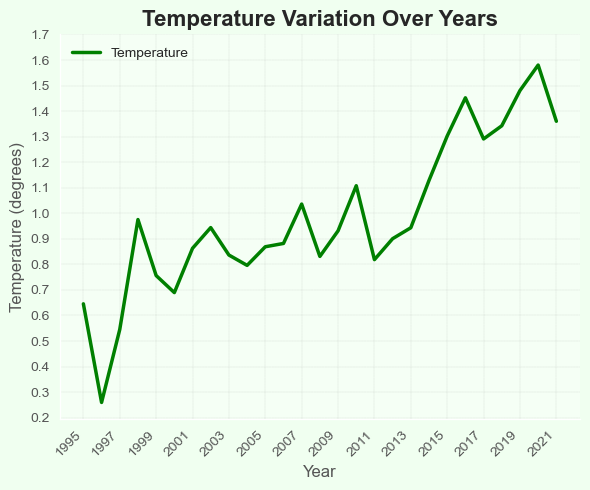

In [13]:
# Set the style
plt.style.use('ggplot')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

year_temp.plot(kind="line", ax=ax, color='green', linewidth=2.5)

ax.set_title("Temperature Variation Over Years", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Temperature (degrees)", fontsize=12)

ax.tick_params(axis='both', which='both', labelsize=10, length=0)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

ax.grid(color='gray', linestyle='--', linewidth=0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.patch.set_facecolor('#f0fff0')

ax.set_facecolor('#f5fff5')

xticks = range(1995, 2022, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

yticks = np.arange(0.2, 1.8, 0.1)
ax.set_yticks(yticks)

ax.legend(["Temperature"], loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


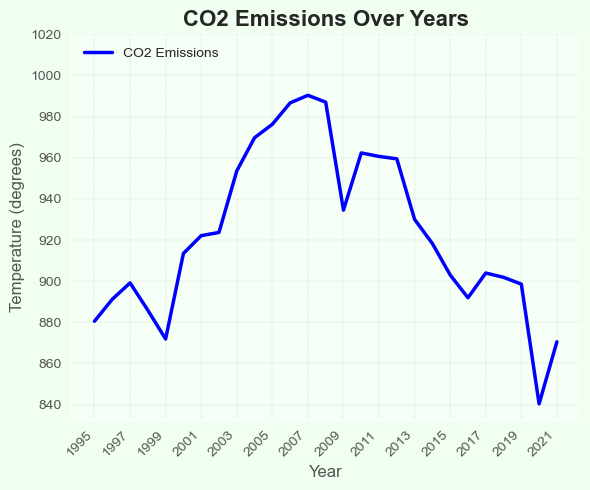

In [14]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 5))

dataset.groupby('Year')['CO2_Emissions'].sum().plot(kind="line", ax=ax, color='blue', linewidth=2.5)

ax.set_title("CO2 Emissions Over Years", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Temperature (degrees)", fontsize=12)


ax.tick_params(axis='both', which='both', labelsize=10, length=0)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

ax.grid(color='gray', linestyle='--', linewidth=0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.patch.set_facecolor('#f0fff0')

ax.set_facecolor('#f5fff5')

xticks = range(1995, 2022, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

yticks = range(840, 1040, 20)
ax.set_yticks(yticks)

ax.legend(["CO2 Emissions"], loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

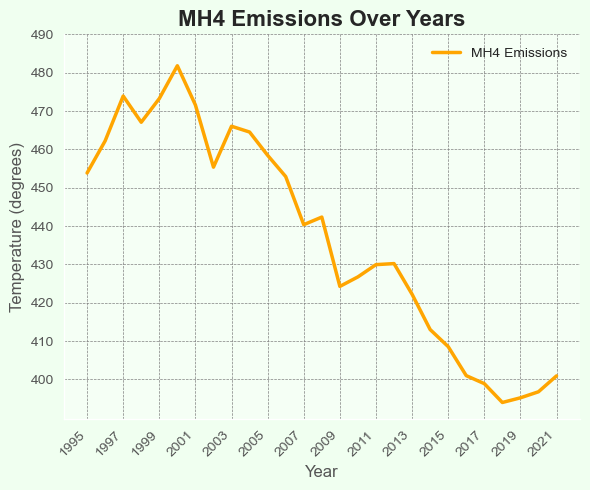

In [15]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 5))

dataset.groupby('Year')['MH4_Emissions'].sum().plot(kind="line", ax=ax, color='orange', linewidth=2.5)

ax.set_title("MH4 Emissions Over Years", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Temperature (degrees)", fontsize=12)

ax.tick_params(axis='both', which='both', labelsize=10, length=0)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

ax.grid(color='gray', linestyle='--', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.patch.set_facecolor('#f0fff0')

ax.set_facecolor('#f5fff5')

xticks = range(1995, 2022, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

yticks = range(400, 500, 10)
ax.set_yticks(yticks)

ax.legend(["MH4 Emissions"], loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

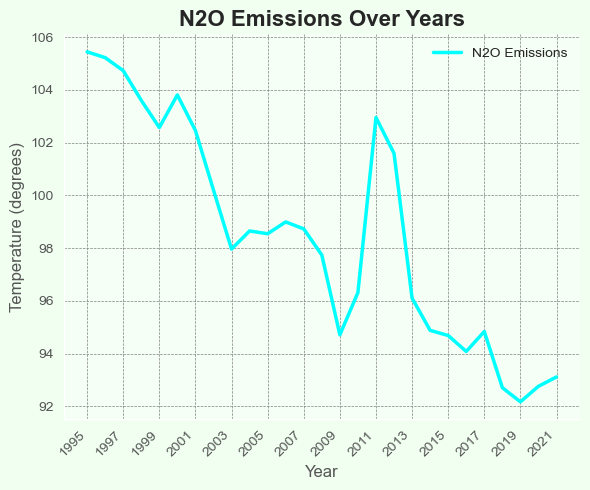

In [16]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 5))

dataset.groupby('Year')['N2O_Emissions'].sum().plot(kind="line", ax=ax, color='cyan', linewidth=2.5)

ax.set_title("N2O Emissions Over Years", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Temperature (degrees)", fontsize=12)


ax.tick_params(axis='both', which='both', labelsize=10, length=0)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

ax.grid(color='gray', linestyle='--', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.patch.set_facecolor('#f0fff0')

ax.set_facecolor('#f5fff5')

xticks = range(1995, 2022, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

yticks = range(92, 108, 2)
ax.set_yticks(yticks)

ax.legend(["N2O Emissions"], loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Year'>

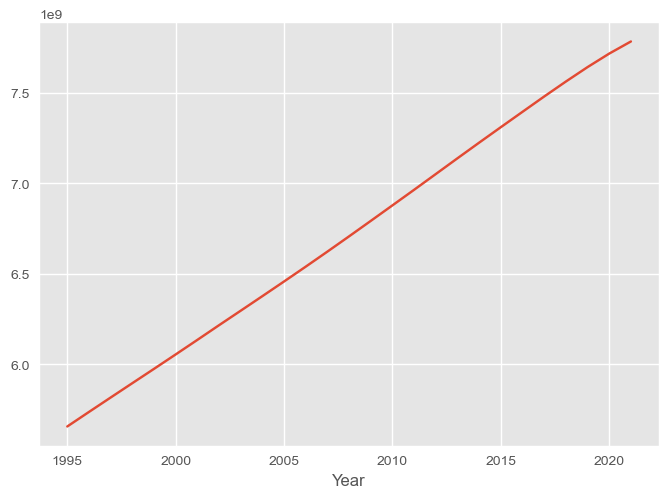

In [17]:
dataset.groupby('Year')['Population'].sum().plot(kind='line')

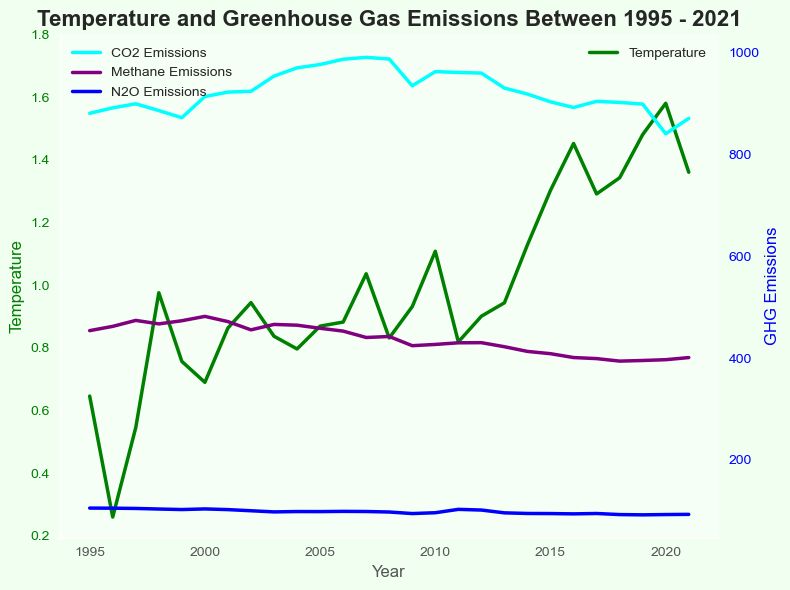

In [18]:

plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

year_temp.plot(kind="line", ax=ax1, color='green', linewidth=2.5)
ax1.set_ylabel("Temperature", color='green')
ax1.tick_params(axis='y', colors='green')

# stacked_data['Total Greenhouse Gas Emissions'].plot(kind="line", ax=ax2, color='blue', linewidth=2.5, label="Total Greenhouse Gas Emissions")
stacked_data['CO2 Emissions'].plot(kind="line", ax=ax2, color='cyan', linewidth=2.5, label="CO2 Emissions")
stacked_data['Methane Emissions'].plot(kind="line", ax=ax2, color='purple', linewidth=2.5, label="Methane Emissions")
stacked_data['Nitrous Oxide Emissions'].plot(kind="line", ax=ax2, color='blue', linewidth=2.5, label="N2O Emissions")
ax2.set_ylabel("GHG Emissions", color='blue')
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("Temperature and Greenhouse Gas Emissions Between 1995 - 2021", fontsize=16, fontweight='bold')
ax1.set_xlabel("Year", fontsize=12)

yticks = np.arange(0.2, 2, 0.2)
ax1.set_yticks(yticks)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc='upper left', fontsize=10)

fig.patch.set_facecolor('#f0fff0')
ax1.set_facecolor('#f5fff5')
ax2.set_facecolor('#f5fff5')

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()


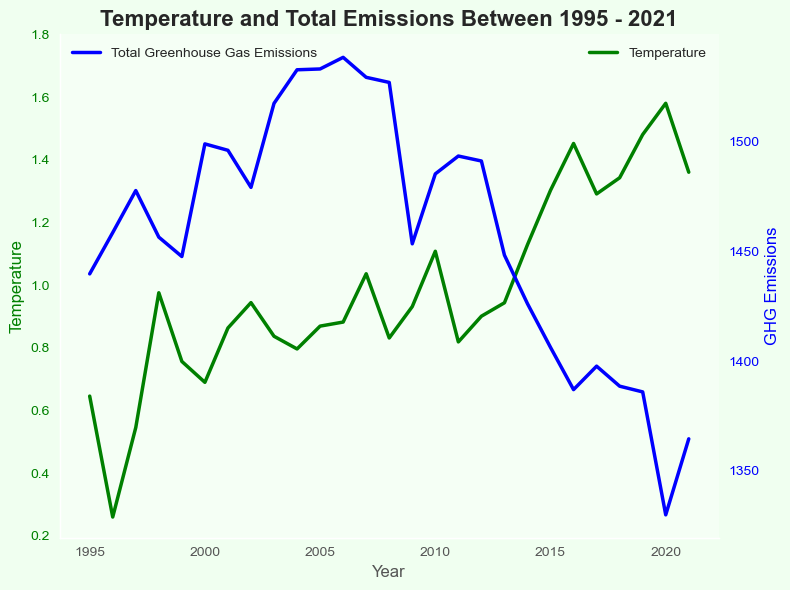

In [19]:

plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

year_temp.plot(kind="line", ax=ax1, color='green', linewidth=2.5)
ax1.set_ylabel("Temperature", color='green')
ax1.tick_params(axis='y', colors='green')

stacked_data['Total Greenhouse Gas Emissions'].plot(kind="line", ax=ax2, color='blue', linewidth=2.5, label="Total Greenhouse Gas Emissions")
ax2.set_ylabel("GHG Emissions", color='blue')
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("Temperature and Total Emissions Between 1995 - 2021", fontsize=16, fontweight='bold')
ax1.set_xlabel("Year", fontsize=12)

yticks = np.arange(0.2, 2, 0.2)
ax1.set_yticks(yticks)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc='upper left', fontsize=10)

fig.patch.set_facecolor('#f0fff0')
ax1.set_facecolor('#f5fff5')
ax2.set_facecolor('#f5fff5')

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()
